<a href="https://colab.research.google.com/github/Natalys2003/Machine-learn/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [26]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv("/content/gladiator_data.csv")


df['Battle Experience'] = [1 if item == 'Yes' else 0 for item in df['Battle Experience']]

df
df.info()

<ipython-input-26-ff3f9926dae8>:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gladiator_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83714 entries, 0 to 83713
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     83714 non-null  object 
 1   Age                      83714 non-null  int64  
 2   Birth Year               83714 non-null  int64  
 3   Origin                   83714 non-null  object 
 4   Height                   83714 non-null  int64  
 5   Weight                   83714 non-null  int64  
 6   Category                 83714 non-null  object 
 7   Wins                     83714 non-null  int64  
 8   Losses                   83714 non-null  int64  
 9   Special Skills           83714 non-null  object 
 10  Weapon of Choice         83714 non-null  object 
 11  Patron Wealth            83714 non-null  object 
 12  Equipment Quality        83714 non-null  object 
 13  Public Favor             83714 non-null  float64
 14  Injury History        

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [27]:
X = df
y = df['Wins'] # целевая переменная
X = X.drop('Wins', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 1279 строк на оубчение и 320 строк на валидацию

(76970     8
 50932    12
 578      12
 47860     5
 29154    10
          ..
 6265      4
 54886    13
 76820     6
 860      12
 15795    11
 Name: Wins, Length: 66971, dtype: int64,
 67703    11
 19281    16
 79430    12
 6748      3
 29078     5
          ..
 48681     9
 50860     9
 8934     14
 83355     5
 24540     8
 Name: Wins, Length: 16743, dtype: int64)

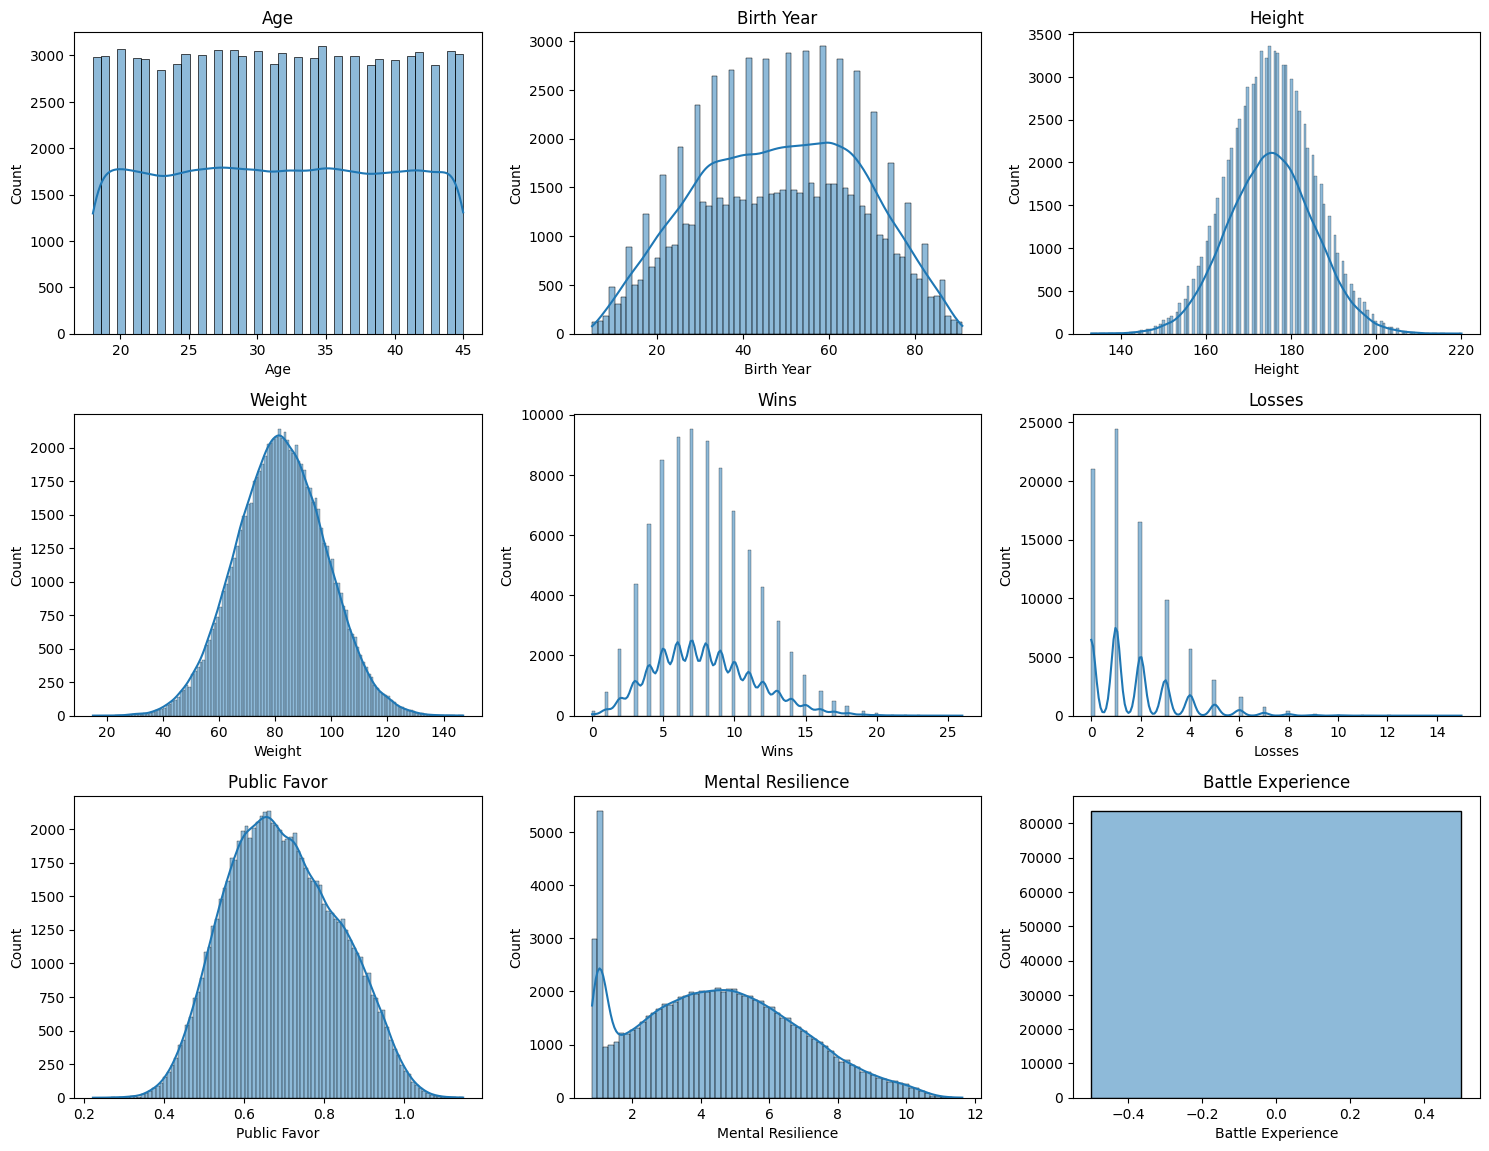

In [28]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns  # выбираем числвоые колонки
cat_columns  = df.select_dtypes(include=['category']).columns # выбираем категориальные колонки
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Battle Experience', ylabel='Wins'>

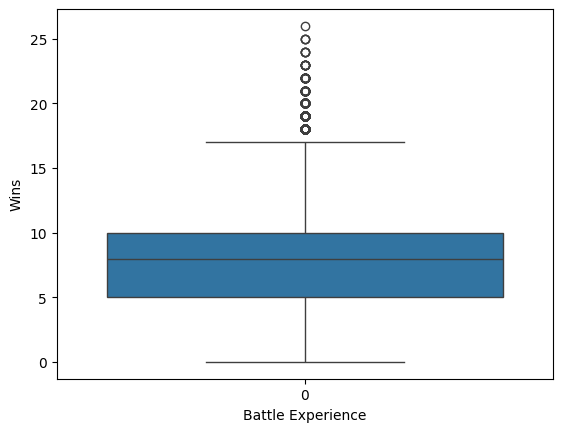

In [29]:
sns.boxplot(data=df, x='Battle Experience', y='Wins')

<ipython-input-30-c9872dbd6b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


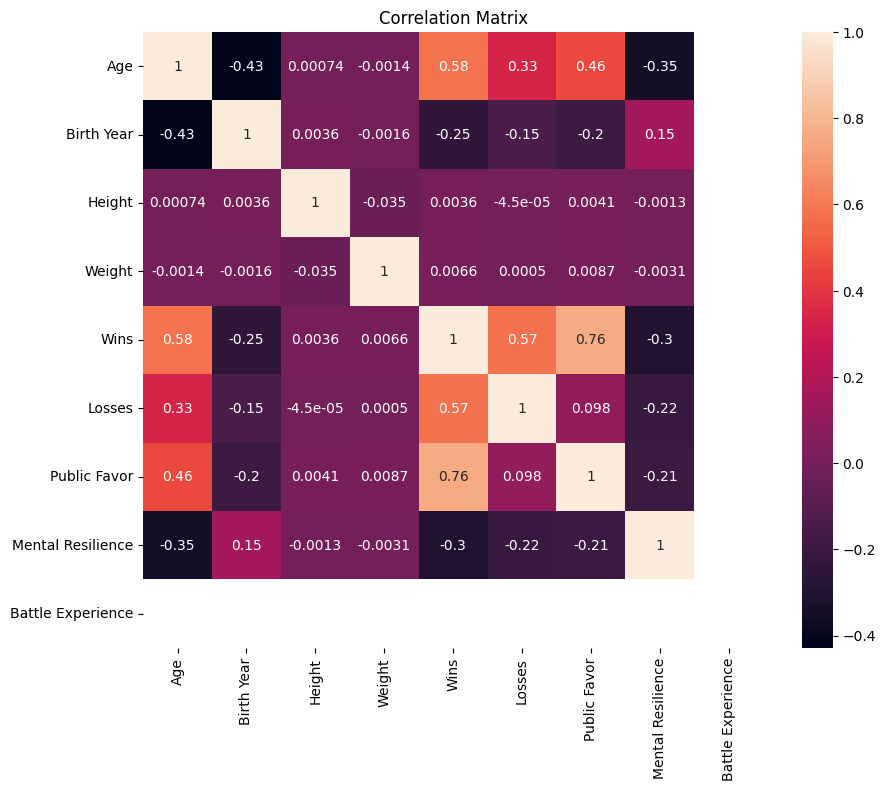

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [32]:
df2 = df[['Battle Experience', 'Losses', 'Wins']]


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df2):
    # Проверка на наличие необходимых столбцов
    required_columns = ['Battle Experience', 'Losses']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    ph_bins_dummies = pd.get_dummies(df_transformed['Battle Experience'], prefix='H')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, ph_bins_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['Battle Experience', 'Losses']])
pd.concat([df_research, df['Wins'], ], axis=1)

,Battle Experience,H_0,Wins
0,0.0,1,4
1,0.0,1,10
2,0.0,1,6
3,0.0,1,7
4,0.0,1,5
...,...,...,...
83709,0.0,1,7
83710,0.0,1,5
83711,0.0,1,4
83712,0.0,1,9


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_research
y = df['Wins']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }


In [36]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 2.7788779761146816,
 'MSE': 12.045558963202476,
 'R2': 0.0,
 'mape (reverted - % верно угаданых)': -6947319204067881.0,
 'mape (original - % ошибок)': 6947319204067981.0}

In [37]:
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

{'MAE': 2.761978446192807,
 'MSE': 11.84265204250112,
 'R2': -3.3648681289299986e-05,
 'mape (reverted - % верно угаданых)': -6575990215295410.0,
 'mape (original - % ошибок)': 6575990215295510.0}

In [38]:

coefficients = model.coef_
coefficients

array([0., 0.])

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [39]:
X.shape

(83714, 2)

In [40]:
X_train.shape

(66971, 2)

In [41]:
import numpy as np

def linear_regression(X, y, learning_rate=0.01, max_iter=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]
    theta = np.zeros(X.shape[1])
    prev_theta = np.zeros(X.shape[1])
    unchanged_count = 0

    for iteration in range(max_iter):
        gradients = -2/m * X.T.dot(y - X.dot(theta))
        prev_theta = theta.copy()
        theta -= learning_rate * gradients

        if np.allclose(prev_theta, theta):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= 5:
            break


    print('коэфциенты регрессии: ', theta)
    return X.dot(theta)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X)
X = np.array(X_train)
y = np.array(y_train)


y_pred = linear_regression(X, y)

compute_metrics(y, y_pred)


-3.3648681289299986e-05
коэфциенты регрессии:  [3.94236984 0.         3.94236984]


{'MAE': 2.7789039480298214,
 'MSE': 12.045561379338302,
 'R2': -2.005831223339527e-07,
 'mape (reverted - % верно угаданых)': -6945949884044427.0,
 'mape (original - % ошибок)': 6945949884044527.0}

In [45]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
print(neigh.predict(X_test).round(2))
print(neigh.predict(X_train))

"""y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)"""
compute_metrics(y_test, y_pred)


KeyboardInterrupt: 

In [44]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

ValueError: array length 66971 does not match index length 16743

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""